### Gradient Descent Method in PyTorch
* In previous jupyter notebook ML_intro.ipynb, we carried out gradient descent method without the help of any machine learning library.
* In this notebook, let the PyToch help us. 
* Again, we have a collection of dots and want to do a linear ($h(x)=mx+b$) regression 

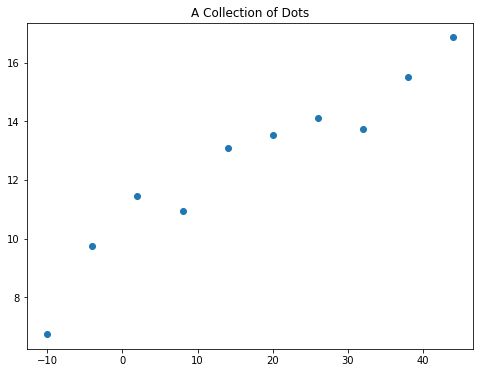

In [1]:
%matplotlib inline  
import numpy as np, torch, matplotlib.pyplot as plt, warnings
warnings.filterwarnings('ignore')  

np.random.seed(100)   
X   = np.arange(-10, 50, 6)  
Y   = X*0.15+np.random.randn(10)+10
X = torch.Tensor(X).view(10, 1) 
Y = torch.Tensor(Y).view(10, 1)  

fig = plt.figure(figsize = (8,6))
ax  = fig.add_subplot(1,1,1)
ax.scatter(X.view(1,-1)[0], Y.view(1,-1)[0])  
_ = plt.title('A Collection of Dots')

### Without the help of optimizer so we update the function of fitting line $h$ manually
* Let us choose a loss function and use the gradient descent method to optimize it.

In [2]:
h        = torch.nn.Linear(1, 1) # once the linear function h is defined  
m        = h.weight              # its weight/slope m is randomly initialized
b        = h.bias                # so is its bias/intercept 
lr       = 0.001                 # learning rate
lossFunc = torch.nn.MSELoss()
print(f'Initial weight {m.data} and bias {b.data}')
print(f'Initial gradient {m.grad} and {b.grad}') # before doing the backpropagation, we see no gradient calculation

Initial weight tensor([[-0.2611]]) and bias tensor([-0.1751])
Initial gradient None and None


* Let us dive into the first epoch so that we know what happend in each optimization step

In [3]:
loss = lossFunc(h(X), Y)              # define the loose function 
print(m.data, b.data, m.grad, b.grad) # before doing the backpropagation, we see no gradient calculation

tensor([[-0.2611]]) tensor([-0.1751]) None None


In [4]:
loss.backward()                       # do gradient calculation
print(m.data, b.data, m.grad, b.grad) # now we get the gradient

tensor([[-0.2611]]) tensor([-0.1751]) tensor([[-830.9535]]) tensor([-34.3687])


In [5]:
m.data -= m.grad * lr                 # manually update weigh with gradient
b.data -= b.grad * lr                 # manually update weigh with gradient
print(m.data, b.data, m.grad, b.grad) # see the result of one downhill descent step

tensor([[0.5699]]) tensor([-0.1407]) tensor([[-830.9535]]) tensor([-34.3687])


In [6]:
h.zero_grad()                         # before next backpropagation, we need clear the result of gradient calculation 
print(m.data, b.data, m.grad, b.grad) # see the result of one downhill descent step

tensor([[0.5699]]) tensor([-0.1407]) tensor([[0.]]) tensor([0.])


* Now repeat 30k time so we get the right $h(x)$

In [7]:
for i in range(30000):
    loss = lossFunc(h(X), Y)          # update the lost function since m and b changed  
    loss.backward() 
    m.data -= m.grad * lr            
    b.data -= b.grad * lr 
    h.zero_grad()                    

print(f'Final weight {m.data} and final bias {b.data}')

Final weight tensor([[0.1542]]) and final bias tensor([9.9487])


* Draw the right $h(x)$

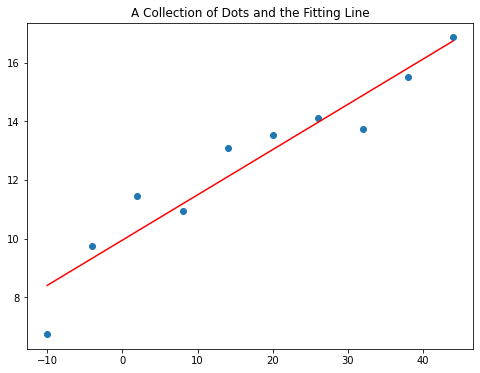

In [8]:
fig = plt.figure(figsize = (8,6))
ax  = fig.add_subplot(1,1,1)
with torch.no_grad(): # turning off gradient calculation
    ax.scatter(X.view(1,-1)[0], Y.view(1,-1)[0])  
    
    ax.plot(X.view(1,-1)[0], h(X).view(1,-1)[0], color='r') # right h(X)  
    
_ = plt.title('A Collection of Dots and the Fitting Line')

### Use optimizer so life is easier
* if we have more parameters to update, we would need more than these two lines.
```
m.data -= m.grad * lr   
b.data -= b.grad * lr
```
* We can use a optimizer to skip manual updating
```
optimizer.step()
```
* Create a new fitting line $h$

In [9]:
h        = torch.nn.Linear(1, 1) # once the linear function h is defined  
m        = h.weight              # its weight/slope m is randomly initialized
b        = h.bias                # so is its bias/intercept 
lr       = 0.001                 # learning rate
lossFunc = torch.nn.MSELoss()
print(f'New Initial weight {m.data} and bias {b.data}')
print(f'New Initial gradient {m.grad} and {b.grad}') # before doing the backpropagation, we see no gradient calculation

New Initial weight tensor([[-0.5301]]) and bias tensor([0.5543])
New Initial gradient None and None


In [10]:
import torch.optim as optim
 
optimizer = optim.SGD(h.parameters(), lr=0.001, momentum=0.9)

for i in range(30000):  
    loss = lossFunc(h(X), Y) 
    loss.backward()
    optimizer.step()            # No manual updating anymore        
    optimizer.zero_grad() 

print(f'New initial weight and bias but same final weight {m.data} and final bias {b.data}')

New initial weight and bias but same final weight tensor([[0.1542]]) and final bias tensor([9.9492])
